In [102]:
import numpy as np
import pandas as pd
import re

In [2]:
data = pd.read_csv("train.csv")

## 1.1

In [3]:
data[data.isna().any(axis=1)]

,Id,surname,name,patronymic,target
1631,1809401,ИВАНОВ,АНАТОЛИЙ,NaN,1.0
2765,1809738,СТЕКЛОВА,ГАЛИНА,NaN,0.0
9762,2211324,АНТОНИШИН,NaN,ВАЛЕНТИНОВИЧ,1.0
12929,2388693,ИППОЛИТОВА,ТАТЬЯНА,NaN,0.0
22277,1812226,ОДИНЦОВА,СВЕТЛАНА,NaN,0.0
...,...,...,...,...,...
5904340,1809541,КРАВЦОВ,ВЛАДИМИР,NaN,1.0
5904455,1812314,БАЕР,ЭЛЛА,NaN,0.0
5905653,1811265,АНТИПЫЧЕВА,ЗИНАИДА,NaN,0.0
5912479,1809202,ГЛИНОВА,ТАМАРА,NaN,0.0


Понятно, что фио дозаполнить нельзя, но можно посмотреть, нет ли пропусков в target. 

In [4]:
data[data['target'].isna()]

,Id,surname,name,patronymic,target
749245,1665280,1900304,МАЛАХОВКА,УЛ.КАЛИНИ,NaN
755005,1654031,ЗАО ПРЕДПРИЯТИЕ ИТИ,ПО ПОСТ.ИНФ.,ТЕХНО,NaN
2254715,1752987,УПРАВЛЕНИЕ ПО ДЕЛАМ,МОЛОДЕЖИ,КУЛЬТУРЫ,NaN
2551660,1654029,АООТЭЛЕКТРОСВЯЗЬ,О,/З-Й УЗЕЛ ЭЛЕКТРОСВЯ,NaN
3313534,1665290,1900163,ЛЮБЕРЦЫ,УЛ.ЮЖНАЯ,NaN
5341561,1656255,КОМИТЕТ ПО ФИЗИЧЕСКО,Й КУЛЬТУРЕ,СПОРТУ,NaN
5476144,1654030,ЗАО ПРЕДПРИЯТИЕ ИТИ,ПО ПОСТ.ИНФ.,ТЕХНО,NaN
5600867,1650995,УПРАВЛЕНИЕ ПО ДЕЛАМ,МОЛОДЕЖИ,КУЛЬТУРЫ,NaN


Получается, что от строк с пропусками в target надо просто избавиться, как и от всех остальных строк с пропусками

In [5]:
data = data.dropna(axis=0)

## 1.2

Список полных тезок

In [6]:
data[data.loc[:, data.columns != 'Id'].duplicated()==True]

,Id,surname,name,patronymic,target
1117,925229,РЫБАКОВА,АННА,НИКОЛАЕВНА,0.0
1567,380669,ЖУКОВА,ЛЮДМИЛА,АНАТОЛЬЕВНА,0.0
1863,429116,ИВАНОВА,ЛИДИЯ,НИКОЛАЕВНА,0.0
3036,5999348,ГАЛКИН,МИХАИЛ,ИВАНОВИЧ,1.0
3147,2736561,ТИТОВА,ВАЛЕНТИНА,НИКОЛАЕВНА,0.0
...,...,...,...,...,...
5917170,2955122,ЗОТОВА,ГАЛИНА,ВЛАДИМИРОВНА,0.0
5917172,1428135,ОРЛОВА,СВЕТЛАНА,АЛЕКСАНДРОВНА,0.0
5917174,3361959,ГРОШЕВ,ЕВГЕНИЙ,ЮРЬЕВИЧ,1.0
5917175,2065244,МАКАРОВА,НИНА,АЛЕКСЕЕВНА,0.0


Повторяющиеся строки это плохо, потому что они смещают веса фичей. Например, если у нас будет 100 вхождений "Ландер Юрий Александрович" и одно "Ландер Юлия Александровна", и если мы будем считать фамилию фичей, то P(m|Ландер) > P(f|Ландер), а это неправда.

In [9]:
data = data.drop_duplicates(subset=['surname', 'name', 'patronymic'], keep = 'last')

## 1.3

In [11]:
import matplotlib.pyplot as plt

In [13]:
colors = ['#DFFF00', '#FFBF00', '#FF7F50', '#DE3163', 
          '#9FE2BF', '#40E0D0', '#6495ED', '#CCCCFF', 
          '#722F37', '#F5DEB3', '#7393B3', '#8A9A5B',
          '#088F8F', '#808000']

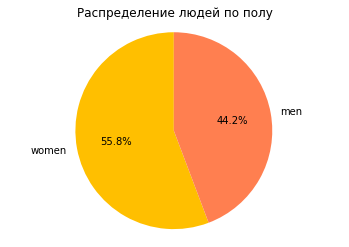

In [26]:
# я взяла этот код из примеров матплотлиба

labels = 'women', 'men'
sizes = [data.loc[data['target'] == 0].size, data.loc[data['target'] == 1].size]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors[1:3])
ax1.axis('equal')

plt.title('Распределение людей по полу')
plt.show()

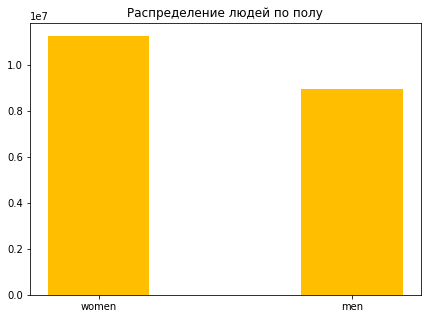

In [43]:
# я взяла этот код из примеров на geeksforgeeks

people = ('women', 'men')
# y_pos = np.arange(len(people))
sizes = [data.loc[data['target'] == 0].size, data.loc[data['target'] == 1].size]
  
fig = plt.figure(figsize = (7, 5), frameon=False)
 
# creating the bar plot
plt.bar(people, sizes, color = colors[1], width = 0.4)
 
plt.title("Распределение людей по полу")
plt.show()

Женщин больше, но вообще всех много

## 1.4

In [44]:
from collections import Counter

In [45]:
def popularity(data, target):
    print('Самые популярные: ', '\n')
    print('Имена: ', Counter(list(data.loc[data['target'] == target]['name'])).most_common(10), '\n')
    print('Фамилии: ', Counter(list(data.loc[data['target'] == target]['surname'])).most_common(10), '\n')
    print('Отчества: ', Counter(list(data.loc[data['target'] == target]['patronymic'])).most_common(10), '\n\n')
    
    print('Наименее популярные: ', '\n')
    print('Имена: ', Counter(list(data.loc[data['target'] == target]['name'])).most_common()[-10:], '\n')
    print('Фамилии: ', Counter(list(data.loc[data['target'] == target]['surname'])).most_common()[-10:], '\n')
    print('Отчества: ', Counter(list(data.loc[data['target'] == target]['patronymic'])).most_common()[-10:])

Для женщин: 

In [48]:
popularity(data, 0)

Самые популярные:  

Имена:  [('ТАТЬЯНА', 118158), ('ЕЛЕНА', 114143), ('НАТАЛЬЯ', 96225), ('ОЛЬГА', 95173), ('АННА', 86293), ('МАРИЯ', 83732), ('ИРИНА', 80438), ('ВАЛЕНТИНА', 80225), ('СВЕТЛАНА', 75625), ('ГАЛИНА', 73132)] 

Фамилии:  [('ИВАНОВА', 3829), ('КУЗНЕЦОВА', 3381), ('СМИРНОВА', 3062), ('ПОПОВА', 2599), ('ВОЛКОВА', 2550), ('НОВИКОВА', 2471), ('КОЗЛОВА', 2408), ('ВАСИЛЬЕВА', 2367), ('ПЕТРОВА', 2353), ('МОРОЗОВА', 2285)] 

Отчества:  [('АЛЕКСАНДРОВНА', 164874), ('НИКОЛАЕВНА', 142347), ('ВЛАДИМИРОВНА', 129932), ('ИВАНОВНА', 127521), ('СЕРГЕЕВНА', 117554), ('ВАСИЛЬЕВНА', 96208), ('МИХАЙЛОВНА', 95881), ('АЛЕКСЕЕВНА', 93704), ('ВИКТОРОВНА', 85393), ('АНАТОЛЬЕВНА', 66296)] 


Наименее популярные:  

Имена:  [('МЕДАН', 1), ('АДИСАТ', 1), ('КАЗИМА', 1), ('ОЙШАХОН', 1), ('ГУЛБАРНА', 1), ('САФАРА', 1), ('ЭЛИЗОВЕТА', 1), ('ЕВГЕГИЯ', 1), ('АРНЕЛИЯ', 1), ('УВЕЙСИ', 1)] 

Фамилии:  [('ЩЕДУШНОВА', 1), ('ХИРНОВА', 1), ('КАРАЧИНОВА', 1), ('ЖАРГАЛОВА', 1), ('КАЛОМИНА', 1), ('ШАМПЛЕТОВА', 1), ('Д

Для мужчин:

In [49]:
popularity(data, 1)

Самые популярные:  

Имена:  [('АЛЕКСАНДР', 139059), ('СЕРГЕЙ', 112257), ('ВЛАДИМИР', 99229), ('АЛЕКСЕЙ', 84324), ('НИКОЛАЙ', 77001), ('АНДРЕЙ', 67585), ('ДМИТРИЙ', 66128), ('ВИКТОР', 60030), ('МИХАИЛ', 59028), ('ЮРИЙ', 52744)] 

Фамилии:  [('ИВАНОВ', 2666), ('КУЗНЕЦОВ', 2283), ('СМИРНОВ', 2040), ('ВОЛКОВ', 1829), ('ПОПОВ', 1820), ('ВАСИЛЬЕВ', 1732), ('НОВИКОВ', 1725), ('ПЕТРОВ', 1702), ('КОЗЛОВ', 1682), ('МОРОЗОВ', 1563)] 

Отчества:  [('АЛЕКСАНДРОВИЧ', 132359), ('НИКОЛАЕВИЧ', 109689), ('ВЛАДИМИРОВИЧ', 109277), ('СЕРГЕЕВИЧ', 95740), ('ИВАНОВИЧ', 85337), ('АЛЕКСЕЕВИЧ', 73950), ('ВИКТОРОВИЧ', 71636), ('МИХАЙЛОВИЧ', 71585), ('ВАСИЛЬЕВИЧ', 65679), ('АНАТОЛЬЕВИЧ', 56015)] 


Наименее популярные:  

Имена:  [('МАСЕЛЬ', 1), ('МУБОРИЗИ', 1), ('РОВЕЧ', 1), ('АЛИАББОС', 1), ('НИКЛОАЙ', 1), ('КУРГАНБАЙ', 1), ('НМКОЛАЙ', 1), ('БИРКАН', 1), ('БЕРЕК', 1), ('УХУМА', 1)] 

Фамилии:  [('БАЗЫЛИН', 1), ('ЛАРАРЕВ', 1), ('РАЗУМЕНКОВ', 1), ('НОВАЛЬСКИЙ', 1), ('ЖЕВНЕРОВИЧ', 1), ('РАЗДОЕВ', 1), ('ПОХОДНОЙ', 

В данных явный сдвиг в сторону русских фио и явный недостаток всех остальных фио. В целом это, наверное, отражает реальную ситуацию. Модель на русских данных будет работать лучше.

На эти данные стоит смотреть раздельно, чтобы посмотреть, какие фичи будут актуальными для каждой группы

## 2.1

In [50]:
def name_lengths(data, gender, column):
    name_lengths = []
    for key, value in Counter([len(name) for name in list(data.loc[data['target'] == gender][column])]).items():
        name_lengths.append((key, value))
    
    name_lengths_list = [item[1] for item in sorted(name_lengths, key = lambda i: i[0])]
    
    return name_lengths, name_lengths_list

In [70]:
def make_plot(title, column, data):
    fig, ax = plt.subplots()

    w_name_lengths, w_name_lengths_list = name_lengths(data, 0, column)

    x1 = [item[0] for item in sorted(w_name_lengths, key = lambda i: i[0])]
    y1 = [i/sum(w_name_lengths_list) for i in w_name_lengths_list]

    ax.plot(x1, y1, linewidth=2.0, color = colors[5], label='women')

    m_name_lengths, m_name_lengths_list = name_lengths(data, 1, column)

    x2 = [item[0] for item in sorted(m_name_lengths, key = lambda i: i[0])]
    y2 =[i/sum(m_name_lengths_list) for i in m_name_lengths_list]

    ax.plot(x2, y2, linewidth=2.0, color = colors[2], label='men')

    plt.title(title)
    ax.legend()
    plt.show()

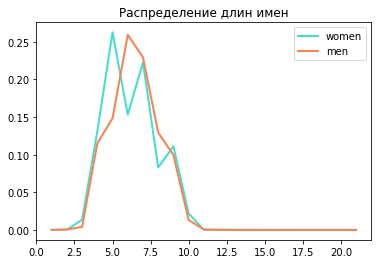

In [71]:
make_plot('Распределение длин имен', 'name', data)

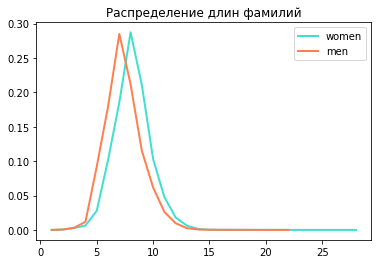

In [72]:
make_plot('Распределение длин фамилий', 'surname', data)

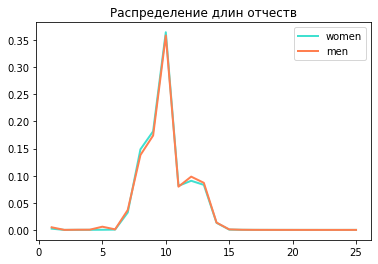

In [73]:
make_plot('Распределение длин отчеств', 'patronymic', data)

Про имена: много женских имен длины пять и много мужских имен длины шесть. Видимо, мужские имена и правда чуть-чуть длиннее женских

Про фамилии: график с мужскими фамилиями явно левее, чем график с женскими, так что женские фамилии длиннее

Про отчества: графики совпадают, разницы в длине нет. Этот признак можно будет не использовать.

## 2.2

In [80]:
# я взяла этот код из примеров матплотлиба

def make_graph_suffixes(data, column, target, title):
    suffixes = [name[-2:] for name in list(data.loc[data['target'] == target][column])]
    labels = [item[0] for item in Counter(suffixes).most_common(5)]
    sizes = [item[1] for item in Counter(suffixes).most_common(5)]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax1.axis('equal')
    
    plt.title(title)
    plt.show()

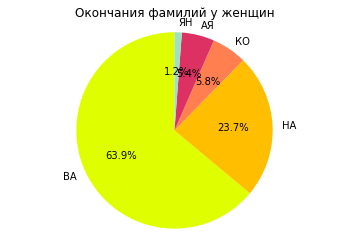

In [81]:
make_graph_suffixes(data, 'surname', 0, 'Окончания фамилий у женщин')

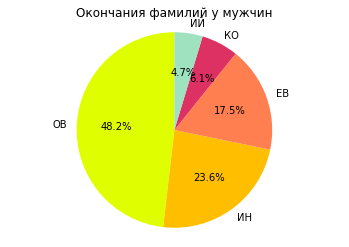

In [82]:
make_graph_suffixes(data, 'surname', 1, 'Окончания фамилий у мужчин')

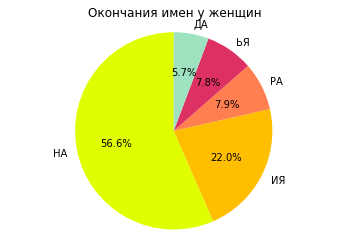

In [83]:
make_graph_suffixes(data, 'name', 0, 'Окончания имен у женщин')

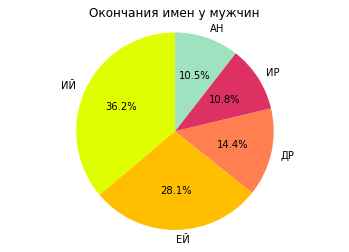

In [84]:
make_graph_suffixes(data, 'name', 1, 'Окончания имен у мужчин')

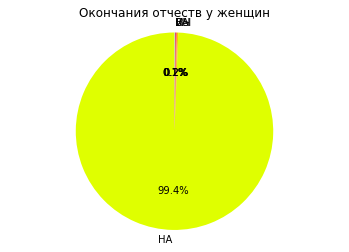

In [85]:
make_graph_suffixes(data, 'patronymic', 0, 'Окончания отчеств у женщин')

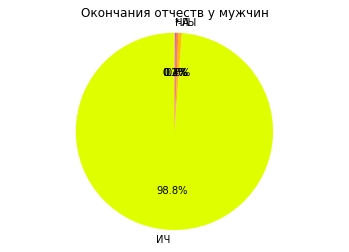

In [86]:
make_graph_suffixes(data, 'patronymic', 1, 'Окончания отчеств у мужчин')

Я взяла для наглядности пять самых популярных в каждом случае. Окончания имен и фамилий сильно различаются, так что эти признаки будут полезны. Отчества очень сильно различаются и для подавляющего большинства данных знания окончания отчества должно хватить для определения пола.

## 2.3

## 3.1

In [87]:
data = data.loc[data['name'].str.contains('[a-zA-Z1-9]', regex=True) == False]
data = data.loc[data['surname'].str.contains('[a-zA-Z1-9]', regex=True) == False]
data = data.loc[data['patronymic'].str.contains('[a-zA-Z1-9]', regex=True) == False]

In [88]:
data['name'] = data['name'].str.upper().str.replace('Ё', 'Е')
data['surname'] = data['surname'].str.upper().str.replace('Ё', 'Е')
data['patronymic'] = data['patronymic'].str.upper().str.replace('Ё', 'Е')

Штуки, в которых есть не кириллица, нужно убрать из нашего трейна, потому что а) с большой вероятностью это не фио, а что-то другое; б) если это фио, то модель будет воспринимать, например, две одинаковые фамилии, в одной из которых все _о_ кириллические, а в другой - латинические, как две разные фамилии, и испортятся вероятности.

In [89]:
data.to_csv('clean_data.csv')

(чекпойнт)

## 3.2

In [109]:
data = pd.read_csv('clean_data.csv')

In [93]:
features = pd.DataFrame()
features['id'] = data['Id']

In [94]:
features['last_letters_name'] = data['name'].apply(lambda x: x[-2:])
features['last_letters_surname'] = data['surname'].apply(lambda x: x[-2:])
features['last_letters_patronymic'] = data['patronymic'].apply(lambda x: x[-2:])

In [95]:
features['len_name'] = data['name'].apply(lambda x: len(x))
features['len_surname'] = data['surname'].apply(lambda x: len(x))
features['len_patronymic'] = data['patronymic'].apply(lambda x: len(x))

In [96]:
features['target'] = data['target']

In [97]:
features.head()

,id,last_letters_name,last_letters_surname,last_letters_patronymic,len_name,len_surname,len_patronymic,target
0,165386,ОР,ИЧ,ИЧ,5,9,8,1.0
1,243807,ГА,ВА,НА,5,8,9,0.0
2,3970023,РК,УК,ИЧ,4,8,9,1.0
3,3670414,ИЯ,АЙ,НА,8,5,10,0.0
4,3477203,КА,ВА,НА,8,8,10,0.0


In [8]:
features.to_csv('features.csv')

Часть 3.3 в другой тетрадке!

## 4: предобработка

In [2]:
test = pd.read_csv("test.csv")

In [4]:
test = test.dropna(axis=0)

In [6]:
test = test.loc[test['name'].str.contains('[a-zA-Z1-9]', regex=True) == False]
test = test.loc[test['surname'].str.contains('[a-zA-Z1-9]', regex=True) == False]
test = test.loc[test['patronymic'].str.contains('[a-zA-Z1-9]', regex=True) == False]

In [3]:
test['name'] = test['name'].str.upper().str.replace('Ё', 'Е')
test['surname'] = test['surname'].str.upper().str.replace('Ё', 'Е')
test['patronymic'] = test['patronymic'].str.upper().str.replace('Ё', 'Е')

In [14]:
features_test = pd.DataFrame()
features_test['id'] = test['Id']

In [8]:
def check(x):
    if isinstance(x, str):
        return x[-2:]
    else:
        return ''

In [13]:
def check2(x):
    if isinstance(x, str):
        return len(x)
    else:
        return 0

In [15]:
features_test['last_letters_name'] = test['name'].apply(lambda x: check(x))
features_test['last_letters_surname'] = test['surname'].apply(lambda x: check(x))
features_test['last_letters_patronymic'] = test['patronymic'].apply(lambda x: check(x))

In [16]:
features_test['len_name'] = test['name'].apply(lambda x: check2(x))
features_test['len_surname'] = test['surname'].apply(lambda x: check2(x))
features_test['len_patronymic'] = test['patronymic'].apply(lambda x: check2(x))

In [18]:
features_test.to_csv('features_test.csv')

Продолжение в другой тетрадке!

## 5: предобработка

In [ ]:
data = pd.read_csv('clean_data.csv')
data = data[:250001]

In [ ]:
new_features = pd.DataFrame()
new_features['id'] = data['Id']
new_features['target'] = data['target']

# разница гласных и согласных в фамилии
new_features['vtoc_surname'] = round(data['surname'].str.count('[УЕЫАОЭЯИЮ]')-data['surname'].str.count('[ЙЦКНГШЩЗХФВПРЛДЖЧСМТБЬЪ]'), 3)

# количество букв п в имени
new_features['numpe'] = data['name'].str.count('П')

In [ ]:
new_features.to_csv('new_features.csv', index=False)

Продолжение в другой тетрадке!